In [4]:
import pandas as pd  #需要安装pandas包读取csv文件
# 读取数据
df = pd.read_csv('wuhan2020.csv')
df

,日期,武汉市
0,2020/1/16,45
1,2020/1/17,62
2,2020/1/18,121
3,2020/1/19,198
4,2020/1/20,270
...,...,...
59,2020/3/15,49999
60,2020/3/16,50003
61,2020/3/17,50004
62,2020/3/18,50005


In [6]:
df_save = df[df.index<61]
df_save

,日期,武汉市
0,2020/1/16,45
1,2020/1/17,62
2,2020/1/18,121
3,2020/1/19,198
4,2020/1/20,270
...,...,...
56,2020/3/12,49986
57,2020/3/13,49991
58,2020/3/14,49995
59,2020/3/15,49999


In [9]:
import numpy as np
t=np.array(df_save.index)
P=np.array(df_save['武汉市'])
print(t)
print(P)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60]
[   45    62   121   198   270   375   444   495   572   618   698  1590
  1905  2261  2639  3215  4109  5142  6384  8351 10117 11618 11618 13603
 14982 16902 18454 19558 32994 35991 37914 39462 41152 42752 44412 45027
 45346 45660 46201 46607 47071 47441 47824 48137 48557 49122 49315 49426
 49540 49671 49797 49871 49912 49948 49965 49978 49986 49991 49995 49999
 50003]


In [14]:
from scipy.optimize import curve_fit
# 定义拟合函数
def func(t, K, r):
    return K / (1 + (K/45 - 1) * np.exp(-1 * r * t))
# 使用curve_fit进行拟合
popt, pcov = curve_fit(func, t, P, maxfev=100000)
# 输出拟合得到的参数值
print("拟合参数:", popt)

拟合参数: [4.96346018e+04 2.63615937e-01]


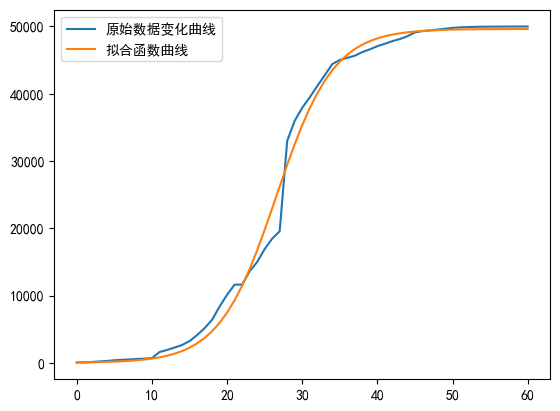

In [17]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
plt.plot(t,P,label='原始数据变化曲线')
plt.plot(t,func(t,popt[0],popt[1]),label='拟合函数曲线')
plt.legend()
plt.show()

In [18]:
diff2=[]
for i in range(59):
    diff2.append(func(i+2,popt[0],popt[1])+func(i,popt[0],popt[1])-2*func(i+1,popt[0],popt[1]))
print(diff2)

[4.078150497533727, 5.300550212797134, 6.886349294358382, 8.941501836997588, 11.601416970551838, 15.038147328235766, 19.468618241580543, 25.163487287438784, 32.455664633488595, 41.74657028647994, 53.506660001027285, 68.26439271554091, 86.57446657454011, 108.95190959764432, 135.75427683584712, 166.99207644664693, 202.0525028236034, 239.34188816000642, 275.89855194664597, 307.10625838023225, 326.73590231009075, 327.6042843508949, 303.0594564631356, 249.17777814178407, 167.01784827503434, 63.819310577135184, -47.857850862019404, -153.15417743114813, -238.94872674460203, -297.1238490534015, -325.7615236341662, -328.19312107676524, -310.82336164564185, -280.8707346652518, -244.76108481442498, -207.35767829079123, -171.8484312993678, -140.00131336558843, -112.54724016577529, -89.54659296636237, -70.67832640669076, -55.44141443668923, -43.281806543745915, -33.66465023915225, -26.110053458804032, -20.206454743020004, -15.611340088493307, -12.045554019437986, -9.284958466043463, -7.151544923181

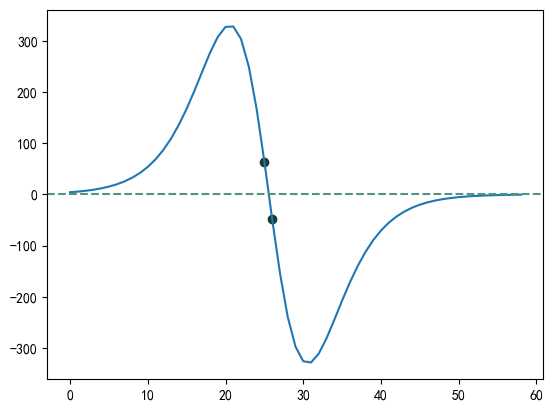

In [38]:
plt.plot(t[:59],diff2)
plt.axhline(y=0, linestyle='--', color='#509579')
plt.scatter(25, diff2[25], color='#1a3b30')
plt.scatter(26, diff2[26], color='#1a3b30')
plt.show()

In [22]:
for i in range(59):
    if diff2[i]*diff2[i+1]<0:
        print('t0 =',i)
        break

t0 = 25


In [34]:
df_save[df_save.index==25]

,日期,武汉市
25,2020/2/10,16902


In [35]:
df_save[df_save.index==26]

,日期,武汉市
26,2020/2/11,18454


In [40]:
df_save[df_save['日期']=='2020/2/1']

,日期,武汉市
16,2020/2/1,4109


In [42]:
df_predict=df_save[df_save.index<16]
df_predict

,日期,武汉市
0,2020/1/16,45
1,2020/1/17,62
2,2020/1/18,121
3,2020/1/19,198
4,2020/1/20,270
5,2020/1/21,375
6,2020/1/22,444
7,2020/1/23,495
8,2020/1/24,572
9,2020/1/25,618


In [43]:
t_pre=np.array(df_predict.index)
P_pre=np.array(df_predict['武汉市'])
popt, pcov = curve_fit(func, t_pre, P_pre, maxfev=100000)
print(popt)

[6.10376831e+03 3.34055875e-01]


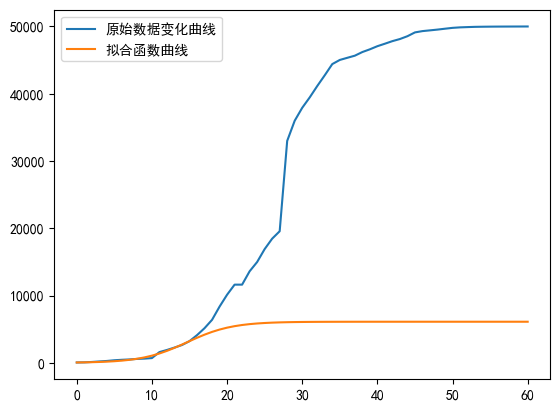

In [44]:
plt.plot(t,P,label='原始数据变化曲线')
plt.plot(t,func(t,popt[0],popt[1]),label='拟合函数曲线')
plt.legend()
plt.show()

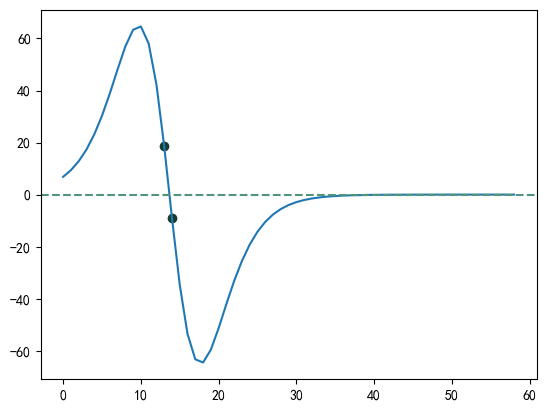

In [49]:
diff_2=[]
for i in range(59):
    diff_2.append(func(i+2,popt[0],popt[1])+func(i,popt[0],popt[1])-2*func(i+1,popt[0],popt[1]))
plt.plot(t[:59],diff_2)
plt.axhline(y=0, linestyle='--', color='#509579')
plt.scatter(13, diff_2[13], color='#1a3b30')
plt.scatter(14, diff_2[14], color='#1a3b30')
plt.show()

In [46]:
for i in range(59):
    if diff_2[i]*diff_2[i+1]<0:
        print('t0 =',i)
        break

t0 = 13


In [47]:
df_save[df_save.index==13]

,日期,武汉市
13,2020/1/29,2261


In [48]:
df_save[df_save.index==14]

,日期,武汉市
14,2020/1/30,2639
